**Name:** Youssef Salem Hassan

**ID:** 211000582

# Road Condition Detection Project
## Using Decision tree model

# **Step 1: Install Required Libraries**



In [ ]:
!pip install bing-image-downloader opencv-python numpy scikit-learn joblib matplotlib seaborn

* **bing-image-downloader:** For downloading images from Bing.
* **opencv-python:** For image processing.
* **numpy:** For numerical operations.
* **scikit-learn:** For machine learning models.
* **joblib:** For saving/loading Python objects.
* **matplotlib and seaborn:** For data visualization.

# Step 2: Import Required Libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import imghdr
from bing_image_downloader import downloader

# Step 3: Define Image Download Function

In [ ]:
def download_images(search_query, limit=100, output_directory="images"):
    """
    Downloads images using bing-image-downloader.
    """
    os.makedirs(output_directory, exist_ok=True)
    try:
        downloader.download(
            search_query,
            limit=limit,
            output_dir=output_directory,
            adult_filter_off=True,
            force_replace=False,
            timeout=60
        )
        print(f"Downloaded {limit} images for '{search_query}' into '{output_directory}'")
    except Exception as e:
        print(f"Error downloading images: {e}")


# Step 4: Download Pothole and Non-Pothole Images

In [ ]:
# Download images
download_images("street potholes on roads", limit=100, output_directory="pothole_images")


Streaming output truncated to the last 5000 lines.



[!!]Indexing page: 896

[%] Indexed 21 Images on Page 896.




[!!]Indexing page: 897

[%] Indexed 21 Images on Page 897.




[!!]Indexing page: 898

[%] Indexed 21 Images on Page 898.




[!!]Indexing page: 899

[%] Indexed 21 Images on Page 899.




[!!]Indexing page: 900

[%] Indexed 21 Images on Page 900.




[!!]Indexing page: 901

[%] Indexed 21 Images on Page 901.




[!!]Indexing page: 902

[%] Indexed 21 Images on Page 902.




[!!]Indexing page: 903

[%] Indexed 21 Images on Page 903.




[!!]Indexing page: 904

[%] Indexed 19 Images on Page 904.




[!!]Indexing page: 905

[%] Indexed 19 Images on Page 905.




[!!]Indexing page: 906

[%] Indexed 21 Images on Page 906.




[!!]Indexing page: 907

[%] Indexed 21 Images on Page 907.




[!!]Indexing page: 908

[%] Indexed 21 Images on Page 908.




[!!]Indexing page: 909

[%] Indexed 21 Images on Page 909.




[!!]Indexing page: 910

[%] Indexed 19 Images on Page 910.




[

In [ ]:
download_images("smooth well-maintained roads", limit=100, output_directory="no_pothole_images")


[%] Downloading Images to /content/no_pothole_images/smooth well-maintained roads


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://roadsmoother.com/wp-content/uploads/2021/02/Smooth-well-maintained-roads-are-safer-roads.jpg
[!] Issue getting: https://roadsmoother.com/wp-content/uploads/2021/02/Smooth-well-maintained-roads-are-safer-roads.jpg
[!] Error:: Remote end closed connection without response
[%] Downloading Image #1 from https://veerle.duoh.com/images/inspiration/_1200x630_crop_center-center_82_none/smooth-surface-waiting-big.jpg?mtime=1527546629
[%] File Downloaded !

[%] Downloading Image #2 from https://roadsmoother.com/wp-content/uploads/2021/02/16febr.jpg
[!] Issue getting: https://roadsmoother.com/wp-content/uploads/2021/02/16febr.jpg
[!] Error:: Remote end closed connection without response
[%] Downloading Image #2 from https://inteng-storage.s3.amazonaws.com/images/JANUARY/sizes/smooth_road_md.jpg
[%] File Downloaded !

[%]

# Step 5: Validate Downloaded Images

In [ ]:
def validate_images(directory):
    """
    Validates and removes corrupted or invalid images in a directory.
    """
    valid_images = 0
    invalid_images = 0
    for file in os.listdir(directory):
        path = os.path.join(directory, file)
        try:
            # Check file type using imghdr
            if imghdr.what(path) is None:
                print(f"Invalid file type: {path}")
                os.remove(path)
                invalid_images += 1
                continue

            # Attempt to read the image with OpenCV
            img = cv2.imread(path)
            if img is None:
                print(f"Failed to load image: {path}")
                os.remove(path)
                invalid_images += 1
            else:
                valid_images += 1
        except Exception as e:
            print(f"Error processing file {path}: {e}")
            os.remove(path)
            invalid_images += 1

    print(f"Validation complete: {valid_images} valid images, {invalid_images} invalid images.")


In [ ]:
validate_images("pothole_images")
validate_images("no_pothole_images")

Validation complete: 106 valid images, 0 invalid images.
Validation complete: 63 valid images, 0 invalid images.


* Verifying their file type with imghdr.what.
* Attempting to load them using cv2.imread.
* Removes invalid images and counts valid/invalid files.

# Step 6: Rename Files for Consistency

In [ ]:
def rename_files_in_directory(directory, prefix):
    """
    Renames files in a directory with a consistent prefix.
    """
    for idx, file in enumerate(os.listdir(directory)):
        old_path = os.path.join(directory, file)
        new_name = f"{prefix}_{idx+1}.jpg"
        new_path = os.path.join(directory, new_name)
        os.rename(old_path, new_path)
    print(f"Renamed files in {directory} with prefix '{prefix}'.")

In [ ]:
# Rename files
rename_files_in_directory("pothole_images", "pothole")
rename_files_in_directory("no_pothole_images", "no_pothole")

Renamed files in pothole_images with prefix 'pothole'.
Renamed files in no_pothole_images with prefix 'no_pothole'.


# Save Scraped Data as a ZIP File

In [ ]:
import os
import zipfile

def save_images_to_zip(directories, output_zip):
    """
    Compress multiple directories into a single zip file.

    Parameters:
    - directories (list): List of directories to include in the zip file.
    - output_zip (str): Name of the output zip file.
    """
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for directory in directories:
            for root, _, files in os.walk(directory):
                for file in files:
                    file_path = os.path.join(root, file)
                    # Add the file to the zip, preserving folder structure
                    zipf.write(file_path, os.path.relpath(file_path, os.path.dirname(directory)))
    print(f"Saved directories {directories} into '{output_zip}' successfully.")

# Directories to compress
directories_to_zip = ["pothole_images", "no_pothole_images"]

# Output zip file name
output_zip_file = "scraped_images.zip"

# Save directories to zip file
save_images_to_zip(directories_to_zip, output_zip_file)

Saved directories ['pothole_images', 'no_pothole_images'] into 'scraped_images.zip' successfully.


# Step 7: Visualize Sample Images

In [ ]:
# def display_sample_images(directory, title, sample_size=5):
#     """
#     Displays a random sample of images from a directory.
#     """
#     files = os.listdir(directory)[:sample_size]
#     fig, axes = plt.subplots(1, sample_size, figsize=(15, 5))
#     for ax, file in zip(axes, files):
#         img_path = os.path.join(directory, file)
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         ax.imshow(img)
#         ax.axis('off')
#     plt.suptitle(title, fontsize=16)
#     plt.show()

def display_sample_images(directory, title, sample_size=5):
    """
    Displays a random sample of images from a directory.
    """
    files = os.listdir(directory)[:sample_size]
    fig, axes = plt.subplots(1, sample_size, figsize=(15, 5))
    for ax, file in zip(axes, files):
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path)

        # Check if the image was loaded successfully
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.axis('off')
        else:
            print(f"Failed to load image: {img_path}")  # Print an error message

    plt.suptitle(title, fontsize=16)
    plt.show()

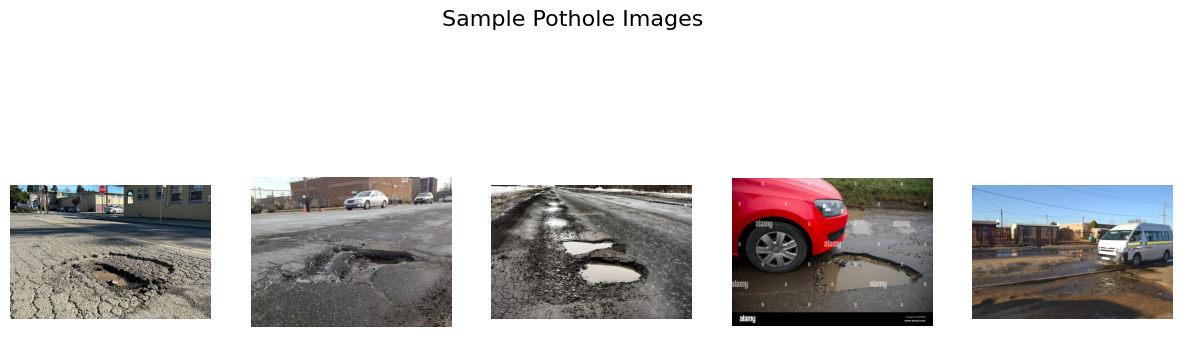

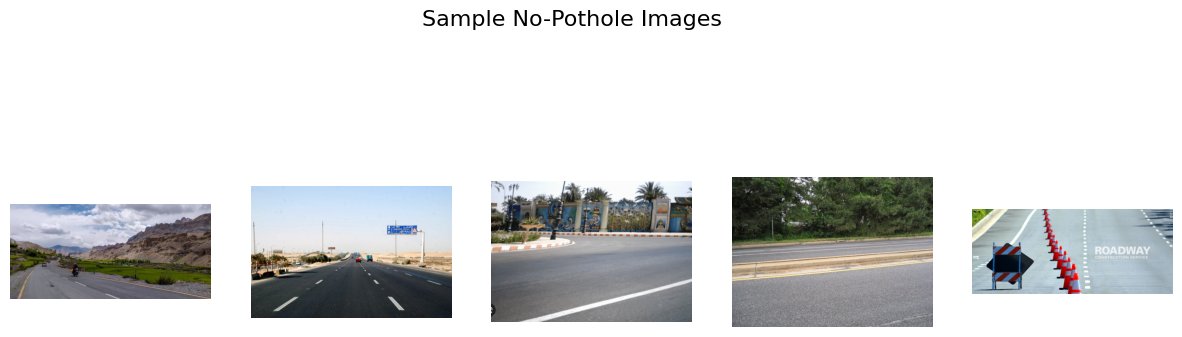

In [ ]:
# Display sample images
display_sample_images("pothole_images", "Sample Pothole Images")
display_sample_images("no_pothole_images", "Sample No-Pothole Images")

# Step 8: Analyze Data

<ipython-input-11-51b4d36e74ef>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="viridis")


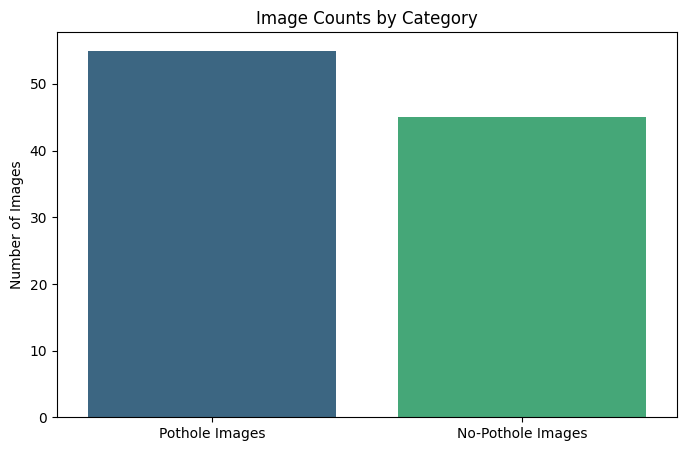

In [ ]:
# def count_images(directory):
#     """
#     Counts the number of images in a directory.
#     """
#     return len([file for file in os.listdir(directory) if imghdr.what(os.path.join(directory, file))])

# # Count images in both directories
# pothole_count = count_images("pothole_images")
# no_pothole_count = count_images("no_pothole_images")

# # Visualization
# categories = ["Pothole Images", "No-Pothole Images"]
# counts = [pothole_count, no_pothole_count]

# plt.figure(figsize=(8, 5))
# sns.barplot(x=categories, y=counts, palette="viridis")
# plt.title("Image Counts by Category")
# plt.ylabel("Number of Images")
# plt.show()

<ipython-input-33-e47a1cf71d5e>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette="viridis")


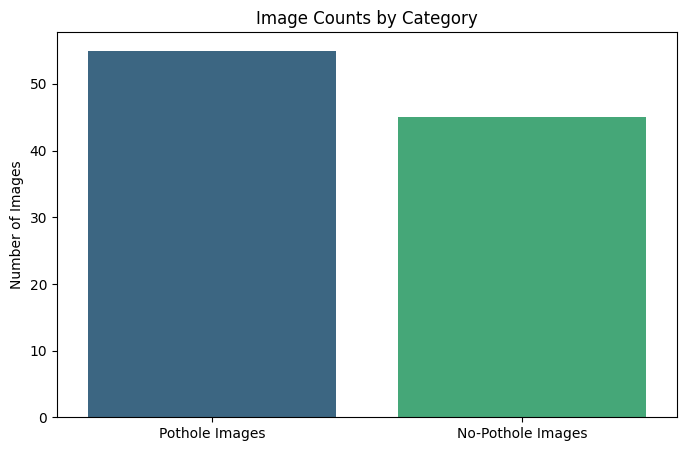

In [ ]:
def count_images(directory):  # bt count valid images
    """
    Counts the number of images in a directory.
    """
    return len([file for file in os.listdir(directory) if imghdr.what(os.path.join(directory, file))])

def get_image_dimensions(directory):  # retrieves dimensions b width w hight
    """
    Returns a list of tuples containing dimensions width, height of all images in directory.
    """
    dimensions = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if imghdr.what(file_path):
            with Image.open(file_path) as img:
                dimensions.append(img.size)
    return dimensions

def get_image_color_channels(directory):
    """
    Returns a list of num of color channels for all images in directory.
    """
    channels = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if imghdr.what(file_path):
            with Image.open(file_path) as img:
                channels.append(len(img.getbands()))
    return channels

def visualize_sample_images(directory, category, num_samples=5):
    """
    Visualizes a sample of images from directory.
    """
    files = [file for file in os.listdir(directory) if imghdr.what(os.path.join(directory, file))]
    sample_files = np.random.choice(files, num_samples, replace=False)

    plt.figure(figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img = Image.open(os.path.join(directory, file))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{category}\n{img.size[0]}x{img.size[1]}")
        plt.axis('off')
    plt.show()


  # Count images in both directories
pothole_count = count_images("pothole_images")
no_pothole_count = count_images("no_pothole_images")

# Visualization of image counts
categories = ["Pothole Images", "No-Pothole Images"]
counts = [pothole_count, no_pothole_count]

plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=counts, palette="viridis")
plt.title("Image Counts by Category")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image

def count_images(directory):
    """
    Counts number of images in a directory.
    """
    return len([file for file in os.listdir(directory) if imghdr.what(os.path.join(directory, file))])

def get_image_dimensions(directory):
    """
    Returns a list of tuples containing dimensions (width, height) of all images in directory.
    """
    dimensions = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if imghdr.what(file_path):
            with Image.open(file_path) as img:
                dimensions.append(img.size)
    return dimensions

Text(0, 0.5, 'Height')

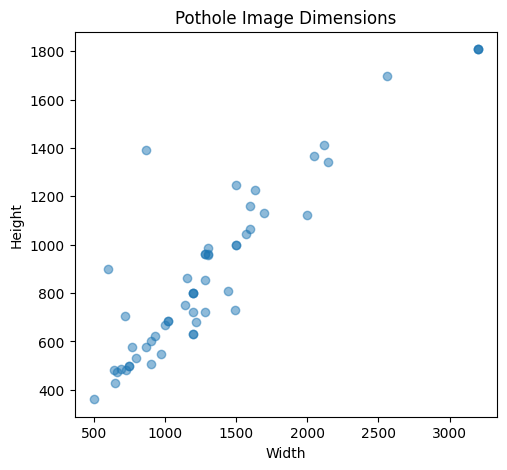

In [ ]:
# Get image dimensions
pothole_dimensions = get_image_dimensions("pothole_images")
no_pothole_dimensions = get_image_dimensions("no_pothole_images")

# Plot image dimensions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter([d[0] for d in pothole_dimensions], [d[1] for d in pothole_dimensions], alpha=0.5)
plt.title("Pothole Image Dimensions")
plt.xlabel("Width")
plt.ylabel("Height")

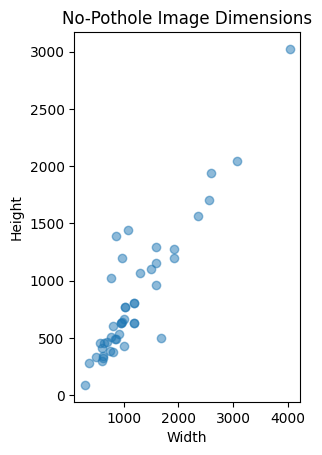

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter([d[0] for d in no_pothole_dimensions], [d[1] for d in no_pothole_dimensions], alpha=0.5)
plt.title("No-Pothole Image Dimensions")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

<ipython-input-40-5ec128c5f9ff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pothole_channels, palette="viridis")


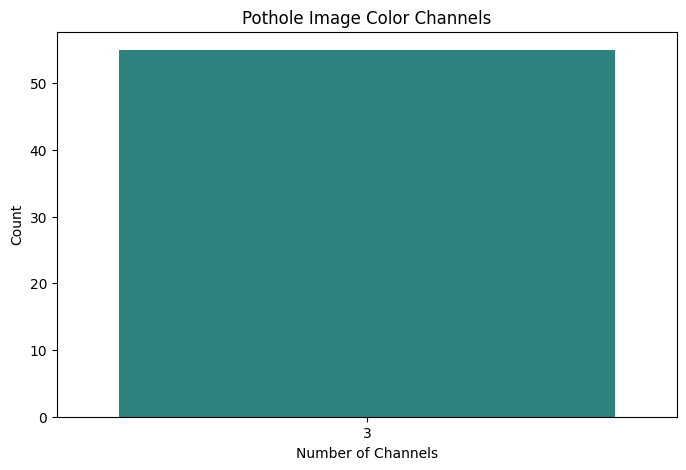

In [ ]:
# Get image color channels
pothole_channels = get_image_color_channels("pothole_images")
no_pothole_channels = get_image_color_channels("no_pothole_images")

# Plot image color channels
plt.figure(figsize=(8, 5))
sns.countplot(x=pothole_channels, palette="viridis")
plt.title("Pothole Image Color Channels")
plt.xlabel("Number of Channels")
plt.ylabel("Count")
plt.show()

<ipython-input-41-e346ae3a7dad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=no_pothole_channels, palette="viridis")


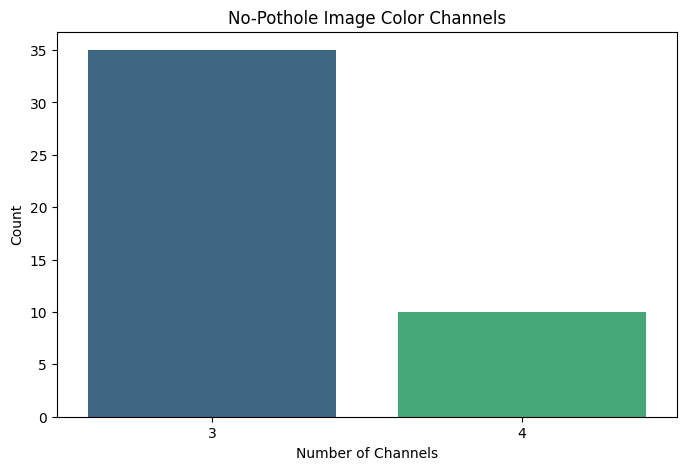

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=no_pothole_channels, palette="viridis")
plt.title("No-Pothole Image Color Channels")
plt.xlabel("Number of Channels")
plt.ylabel("Count")
plt.show()

# Step 9: Save Valid Data for Future Use

In [ ]:
import joblib

def save_dataset(directory, output_file):
    """
    Saves dataset paths as a list for future use.
    """
    file_paths = [
        os.path.join(directory, file)
        for file in os.listdir(directory)
        if imghdr.what(os.path.join(directory, file))
    ]
    joblib.dump(file_paths, output_file)
    print(f"Dataset saved to {output_file}.")

# Save datasets
save_dataset("pothole_images", "pothole_dataset.pkl")
save_dataset("no_pothole_images", "no_pothole_dataset.pkl")


Dataset saved to pothole_dataset.pkl.
Dataset saved to no_pothole_dataset.pkl.


# Step 10: Test Dataset Loading

In [ ]:
def load_dataset(file_path):
    """
    Loads dataset from a saved file.
    """
    return joblib.load(file_path)

# Load and test datasets
pothole_dataset = load_dataset("pothole_dataset.pkl")
no_pothole_dataset = load_dataset("no_pothole_dataset.pkl")

print(f"Pothole dataset contains {len(pothole_dataset)} images.")
print(f"No-pothole dataset contains {len(no_pothole_dataset)} images.")


Pothole dataset contains 55 images.
No-pothole dataset contains 45 images.


# Step 11: Build and Preprocess Data for Model Training

Preprocessing and Resizing Images

In [ ]:
def preprocess_images(image_paths, target_size=(128, 128)):
    """
    Reads, resizes, and normalizes images for model training.
    """
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)  # Resize to target size
        images.append(img / 255.0)  # Normalize pixel values
    return np.array(images)

# Preprocess pothole and no-pothole images
pothole_images = preprocess_images(pothole_dataset)
no_pothole_images = preprocess_images(no_pothole_dataset)

Create Labels and Combine Data

In [ ]:
# Create labels
pothole_labels = np.ones(len(pothole_images))  # Label 1 for pothole images
no_pothole_labels = np.zeros(len(no_pothole_images))  # Label 0 for no-pothole images

# Combine images and labels
X = np.concatenate((pothole_images, no_pothole_images), axis=0)
y = np.concatenate((pothole_labels, no_pothole_labels), axis=0)

# Shuffle data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

print(f"Dataset size: {X.shape[0]} images, each of shape {X.shape[1:]}")

Dataset size: 100 images, each of shape (128, 128, 3)


Split Data into Training and Testing Sets

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f"Training set: {X_train.shape[0]} images")
# print(f"Testing set: {X_test.shape[0]} images")


# Step 12: Build a Simple Machine Learning Model

Decision trees work with tabular data, so we need to reshape the image arrays into 1D feature vectors.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Flatten image data
X_flattened = X.reshape(X.shape[0], -1)  # Reshape to (num_samples, num_features)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (80, 49152)
Testing set shape: (20, 49152)


49152 --->  number of features   "Column"

The number 49152 comes from the size of images after preprocessing. Here’s how it is calculated:


Image Dimensions (Height × Width × Channels):
images were resized to 128×128 pixels with 3 color channels (RGB).

128
×
128
×
3
=
49152

Flattening:
Each image, originally a 3D array of shape (128, 128, 3), is reshaped into a 1D array of shape (49152,) for compatibility with Decision Tree model.

## 2. Build and Train the Decision Tree Model

We use DecisionTreeClassifier from sklearn to build the model.

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Decision Tree Classifier trained successfully.")
print(f"Training set: {X_train.shape[0]} images")
print(f"Testing set: {X_test.shape[0]} images")

Decision Tree Classifier trained successfully.
Training set: 80 images
Testing set: 20 images


Evaluate the trained model on the test data.

In [ ]:
# Predict on test data
y_pred = clf.predict(X_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 70.00%


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.83      0.62         6
         1.0       0.90      0.64      0.75        14

    accuracy                           0.70        20
   macro avg       0.70      0.74      0.69        20
weighted avg       0.78      0.70      0.71        20



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[5 1]
 [5 9]]


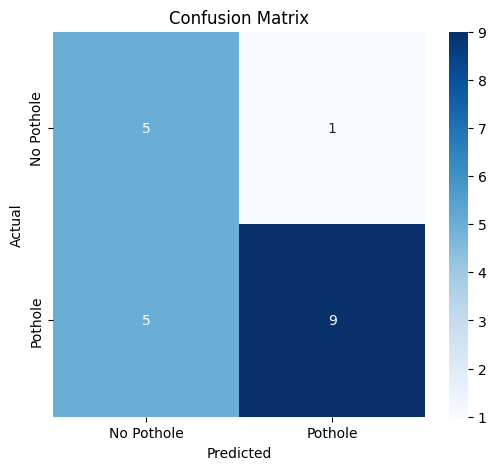

In [ ]:
# Plot Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Pothole", "Pothole"], yticklabels=["No Pothole", "Pothole"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 4. Visualize the Decision Tree

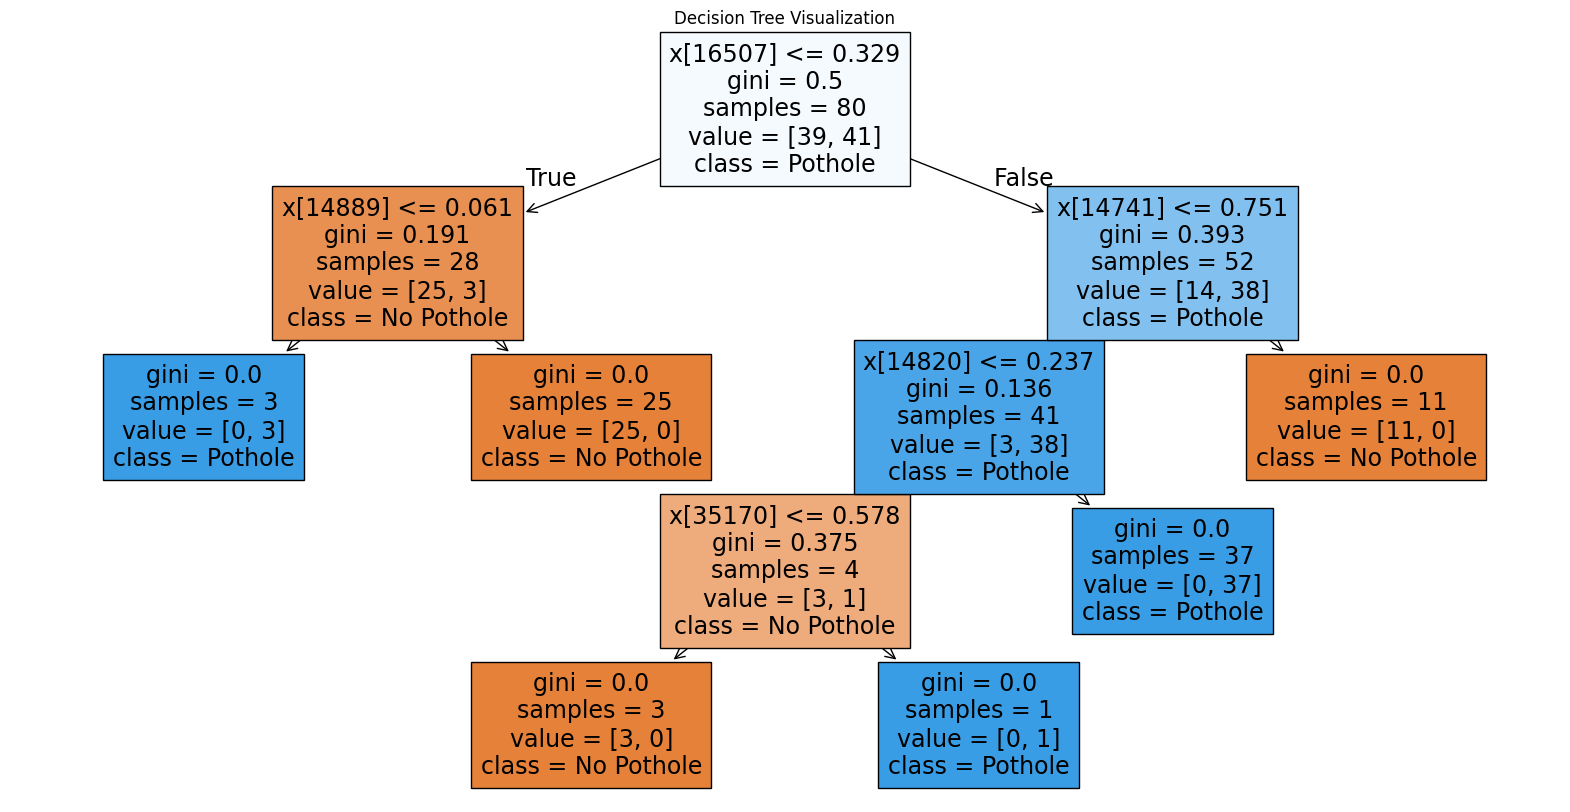

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    filled=True,
    feature_names=None,
    class_names=["No Pothole", "Pothole"]
)
plt.title("Decision Tree Visualization")
plt.show()

# Test the Model with New Images

In [ ]:
def predict_with_decision_tree(model, image_path):
    """
    Predict using the trained decision tree model.
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128)) / 255.0
    img_flattened = img.reshape(1, -1)  # Flatten the image
    prediction = model.predict(img_flattened)
    return "Pothole" if prediction[0] == 1 else "No Pothole"

# Test with a sample image
sample_image_path = pothole_dataset[0]
result = predict_with_decision_tree(clf, sample_image_path)
print(f"Prediction for sample image: {result}")

Prediction for sample image: Pothole


In [ ]:
# Flatten image data
X_flattened = X.reshape(X.shape[0], -1)  # Reshape to (num_samples, num_features)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, stratify=y, random_state=42)  # Added stratify

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Reshape X to 2D before splitting
X_flattened = X.reshape(X.shape[0], -1)  # Reshape (num_samples, num_features)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flattened, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.8615
Recall: 0.8000
F1-Score: 0.7960


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No-Pothole", "Pothole"]))


Classification Report:
              precision    recall  f1-score   support

  No-Pothole       0.69      1.00      0.82         9
     Pothole       1.00      0.64      0.78        11

    accuracy                           0.80        20
   macro avg       0.85      0.82      0.80        20
weighted avg       0.86      0.80      0.80        20



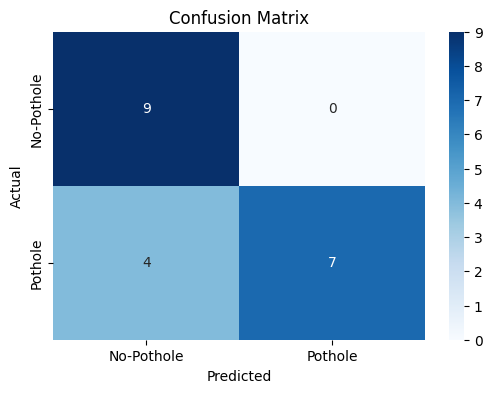

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No-Pothole", "Pothole"], yticklabels=["No-Pothole", "Pothole"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Cross-validation
cv_scores = cross_val_score(decision_tree, X_flattened, y, cv=5, scoring="accuracy") # Pass the flattened X here as well
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.8  0.8  0.5  0.7  0.75]
Mean Cross-Validation Accuracy: 0.7100
Standard Deviation: 0.1114


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def validate_decision_tree(X_train, y_train, X_val=None, y_val=None, cv=5, max_depth=None, random_state=42):
    """
    Validates a Decision Tree model using cross-validation or a validation set.

    Args:
        X_train (np.array): Training features.
        y_train (np.array): Training labels.
        X_val (np.array): Validation features (optional).
        y_val (np.array): Validation labels (optional).
        cv (int): Number of folds for cross-validation.
        max_depth (int): Maximum depth of the Decision Tree.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Validation results including accuracy, precision, recall, and F1-score.
    """
    results = {}

    # Initialize the Decision Tree model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

    # Cross-validation
    if X_val is None or y_val is None:
        print("Performing cross-validation...")
        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)
        cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy")
        results["cross_val_accuracy"] = cv_scores.mean()
        results["cross_val_std"] = cv_scores.std()
        print(f"Cross-validation accuracy: {results['cross_val_accuracy']:.4f} (±{results['cross_val_std']:.4f})")

    # Validation set
    else:
        print("Evaluating on validation set...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate metrics
        results["accuracy"] = accuracy_score(y_val, y_pred)
        results["precision"] = precision_score(y_val, y_pred, average="weighted")
        results["recall"] = recall_score(y_val, y_pred, average="weighted")
        results["f1_score"] = f1_score(y_val, y_pred, average="weighted")

        print(f"Validation accuracy: {results['accuracy']:.4f}")
        print(f"Validation precision: {results['precision']:.4f}")
        print(f"Validation recall: {results['recall']:.4f}")
        print(f"Validation F1-score: {results['f1_score']:.4f}")

    return results

# Option 1: Cross-validation
print("Cross-Validation Results:")
cv_results = validate_decision_tree(X_train, y_train, cv=5, max_depth=5)
print(cv_results)

# Option 2: Validation set
# Split training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print("\nValidation Set Results:")
val_results = validate_decision_tree(X_train_split, y_train_split, X_val_split, y_val_split, max_depth=5)
print(val_results)

Cross-Validation Results:
Performing cross-validation...
Cross-validation accuracy: 0.4625 (±0.1510)
{'cross_val_accuracy': 0.4625, 'cross_val_std': 0.15103807466993216}

Validation Set Results:
Evaluating on validation set...
Validation accuracy: 0.6250
Validation precision: 0.6250
Validation recall: 0.6250
Validation F1-score: 0.6250
{'accuracy': 0.625, 'precision': 0.625, 'recall': 0.625, 'f1_score': 0.625}
